## Customer Conversion Prediction Project

### Problem statement:
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

### Feature and Target variable Description:

1.age (numeric)

2.job : type of job

3.marital : marital status

4.educational_qual : education status

5.call_type : contact communication type

6.day: last contact day of the month (numeric)

7.mon: last contact month of year

8.dur: last contact duration, in seconds (numeric)

9.num_calls: number of contacts performed during this campaign and for this client

10.prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

11.Output variable (desired target): y - has the client subscribed to the insurance?

### Basic details about the Dataset

-->Supervised Lesrning Problem
-->Classification(based on Target Variable)

-->From the Target variable we can consider it is a Binary classification problem, 

-->Here,we are required to build a ML model that will predict if a client will subscribe to the insurance.

importing the required Libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [399]:
df=pd.read_csv("C:/Users/DELL-22/Desktop/Final Project/train.csv")

In [400]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


Changing column name

In [401]:
df=df.rename(columns={"y":"subscribe"})

Encode the Target variable for Pre-processing

In [402]:
df["subscribe"]=df["subscribe"].map({"yes":1,"no":0})

In [403]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,subscribe
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


### Data Preprocessing

In [321]:
#Missing Value - no
#Duplictes     - yes,it is corrected by droping the duplictaes
#unstructured data- no,data is in structured format
#incorrect format - no,datas are in corrected format
#outlier correction - corrected (by clipping)

Checking Missing Values in the data

In [404]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
subscribe         0
dtype: int64

In [405]:
df.shape

(45211, 11)

Checking the duplicates in the data

In [406]:
df.duplicated().sum()

6

#### There is Duplicates in the data,to get the perfect prediction we drop the duplicates in the data 

droping duplicates in the Data

In [407]:
df = df.drop_duplicates()

In [408]:
df.duplicated().sum()

0

In [409]:
df.shape

(45205, 11)

Checking the datatypes in the data

In [410]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
subscribe          int64
dtype: object

#### Outlier correction

In [411]:
for col in ["age","day","dur","num_calls"]:
    iqr=df[col].quantile(0.75)-df[col].quantile(0.25)
    upper_threshold=df[col].quantile(0.75) + (1.5*iqr)
    lower_threshold=df[col].quantile(0.25) - (1.5*iqr)
    df[col]=df[col].clip(lower_threshold,upper_threshold)

#### The outliers are corrected by clipping the upper_thresold,lower_threshold in the data

## EDA and Encode

### Age

subscribe
0    40.797362
1    41.410096
Name: age, dtype: float64


<Axes: xlabel='subscribe'>

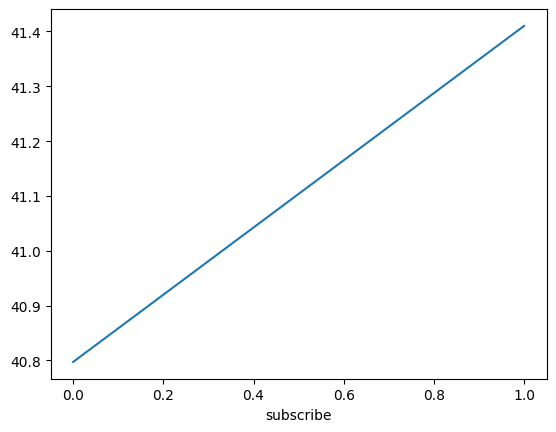

In [412]:
print(df.groupby("subscribe")["age"].mean())
df.groupby("subscribe")["age"].mean().plot()

#### 1.The above graph represented that there is a strong relationship between the the Feature variable(age) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of age between(40 to 41) are the majority people can have the possibilities to subscribe more for the Insurance


### Job

In [413]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [414]:
df.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [415]:
#Handling unknown in job column
pert_of_unknow = (288/45205)
pert_of_unknow*100

0.6370976661873686

#### 0.63% of unknown data values cannot affect the prediction,so,we drop that row in the job column,considering that as a nan value

In [416]:
df["job"]=df["job"].replace("unknown",np.nan)

In [417]:
df.job.isna().sum()

288

In [418]:
df=df.dropna(subset="job")

In [419]:
df.job.isna().sum()

0

job
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
services         0.088851
technician       0.110585
self-employed    0.118429
admin.           0.122050
management       0.137570
unemployed       0.155027
retired          0.227915
student          0.286780
Name: subscribe, dtype: float64


<Axes: xlabel='job'>

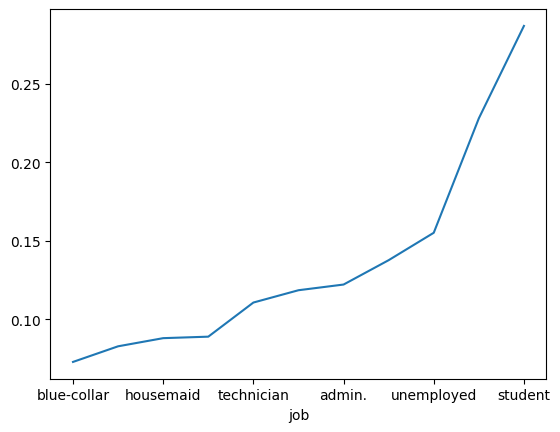

In [420]:
print(df.groupby("job")["subscribe"].mean().sort_values())
#compared with subscribe vs Job
df.groupby('job')['subscribe'].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(job) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of job column blue-collar are the majority people in the data,but,the percentage of probability to subscribe more for the Insurance is students

In [422]:
df["job"]=df["job"].map({'student':11, 'retired':10, 'unemployed':9, 'management':8,'admin.':7,'self-employed':6, 'technician':5, 'services':4,
       'housemaid':3, 'entrepreneur':2,'blue-collar':1})

### Marital status

In [340]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [341]:
df.marital.value_counts()

marital
married     27007
single      12720
divorced     5190
Name: count, dtype: int64

marital
divorced    0.119653
married     0.101233
single      0.149371
Name: subscribe, dtype: float64


<Axes: xlabel='marital'>

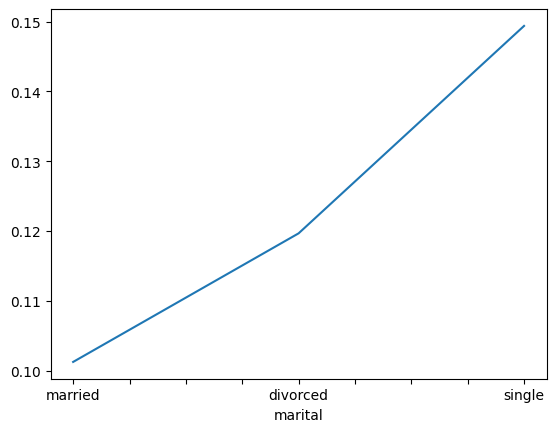

In [342]:
print(df.groupby("marital")["subscribe"].mean())
#compared with subscribe vs marital
df.groupby("marital")["subscribe"].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(marital_status) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of marital_status column married are the majority people in the data,but,the percentage of probability to subscribe more for the Insurance is singles

In [343]:
df["marital"]=df["marital"].map({"single":3,"divorced":2,"married":1})

### Education_qualification

In [344]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [345]:
df.education_qual.value_counts()

education_qual
secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: count, dtype: int64

In [346]:
#Handling unknown in Education_qual column
pert_of_unknow = (1730/45205)
pert_of_unknow*100

3.8270102864727353

#### 3.82% of unknown data values can affect the prediction,so,we retain that row in the Education_qual column,considering that for Prediction

education_qual
primary      0.086483
secondary    0.105543
tertiary     0.150226
unknown      0.135260
Name: subscribe, dtype: float64


<Axes: xlabel='education_qual'>

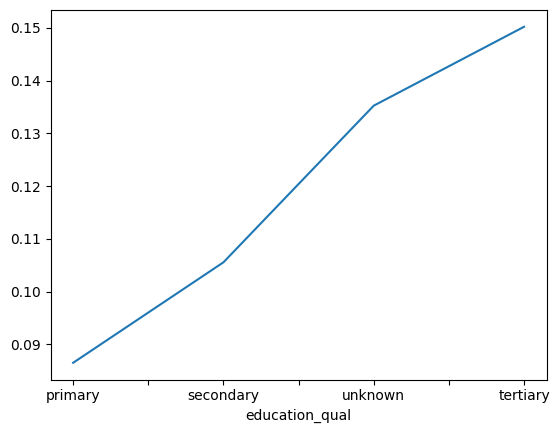

In [347]:
print(df.groupby("education_qual")["subscribe"].mean())
#compared with subscribe vs education_qual
df.groupby("education_qual")["subscribe"].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(education_qualification) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of education_qualification column secondary are the majority people in the data,but,the percentage of probability to subscribe more for the Insurance is tertiary

In [348]:
df["education_qual"]=df["education_qual"].map({"tertiary":4,"unknown":3,"secondary":2,"primary":1})

### Call_type

In [349]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [350]:
df.call_type.value_counts()

call_type
cellular     29151
unknown      12906
telephone     2860
Name: count, dtype: int64

In [351]:
#Handling unknown in call_type column
pert_of_unknow = (2860/45205)
pert_of_unknow*100

6.326733768388452

#### 6.32% of unknown data values can affect the prediction,so,we retain that row in the call_type column,considering that for Prediction

call_type
cellular     0.148949
telephone    0.134615
unknown      0.040911
Name: subscribe, dtype: float64


<Axes: xlabel='call_type'>

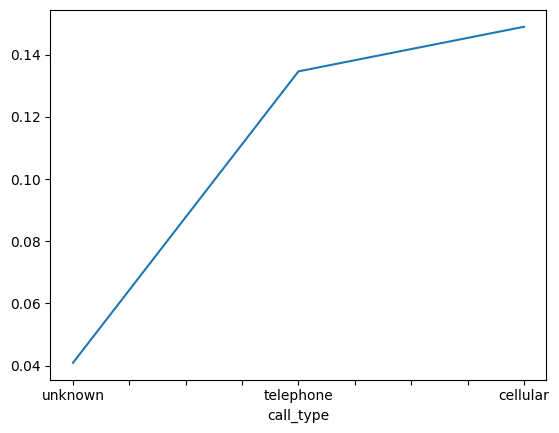

In [352]:
print(df.groupby("call_type")["subscribe"].mean())
#compared with subscribe vs call_type
df.groupby("call_type")["subscribe"].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(call_type) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of call_type column cellular are the majority people in the data,also,the percentage of probability to subscribe more for the Insurance is cellular

In [353]:
df["call_type"]=df["call_type"].map({'cellular':3, 'telephone':2,'unknown':1})

### Day

subscribe
0    15.901190
1    15.158896
Name: day, dtype: float64


<Axes: xlabel='subscribe'>

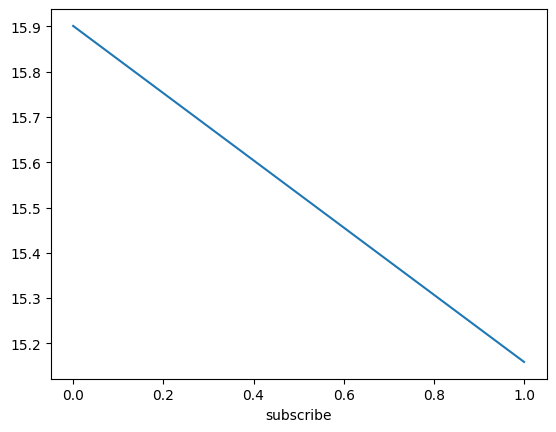

In [354]:
print(df.groupby("subscribe")["day"].mean())
#compared with subscribe vs day
(df.groupby("subscribe")["day"].mean()).sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(day) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of day column ,the percentage of probability to subscribe more for the Insurance is after 15th

### Month

In [355]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [356]:
df.mon.value_counts()

mon
may    13734
jul     6863
aug     6182
jun     5249
nov     3956
apr     2925
feb     2636
jan     1388
oct      727
sep      570
mar      474
dec      213
Name: count, dtype: int64

mon
may    0.067133
jul    0.091214
jan    0.100144
nov    0.101365
jun    0.103829
aug    0.110482
feb    0.165781
apr    0.195214
oct    0.437414
sep    0.466667
dec    0.469484
mar    0.521097
Name: subscribe, dtype: float64


<Axes: xlabel='mon'>

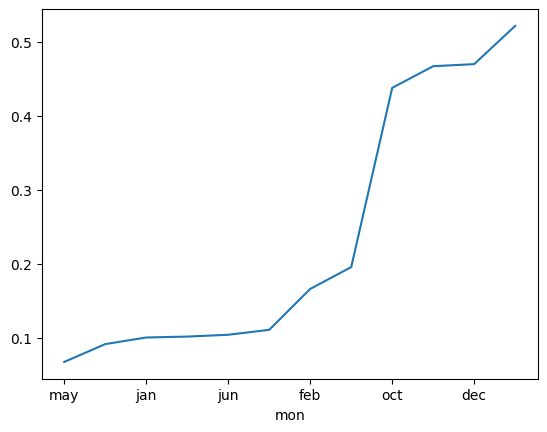

In [357]:
print(df.groupby("mon")["subscribe"].mean().sort_values())
#compared with subscribe vs month
df.groupby("mon")["subscribe"].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(month) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of month column may are the majority people in the data,but,the percentage of probability to subscribe more for the Insurance is march

In [358]:
df["mon"]=df["mon"].map({'may':1, 'jun':5, 'jul':2, 'aug':6, 'oct':9, 'nov':4, 'dec':11, 'jan':3, 'feb':7,
       'mar':12, 'apr':8, 'sep':10})

### dur

subscribe
0    209.901039
1    424.749001
Name: dur, dtype: float64


<Axes: xlabel='subscribe'>

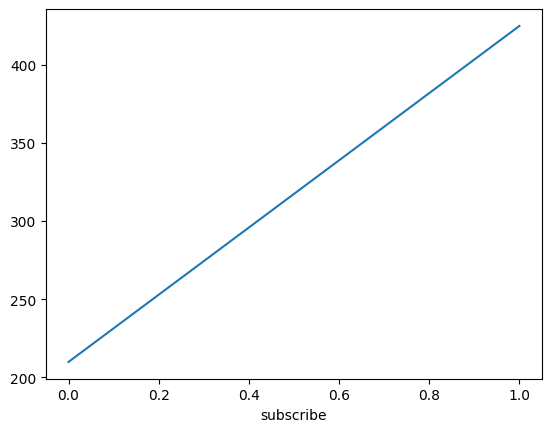

In [359]:
print(df.groupby("subscribe")["dur"].mean())
#compared with subscribe vs dur
df.groupby("subscribe")["dur"].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(duration) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of duration column between(209 to 424 sec) are the majority people can have the possibilities to subscribe more for the Insurance

### num_calls

subscribe
0    2.439085
1    2.024167
Name: num_calls, dtype: float64


<Axes: xlabel='subscribe'>

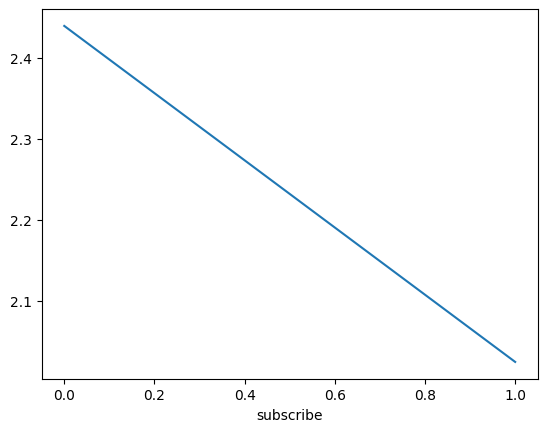

In [360]:
print(df.groupby("subscribe")["num_calls"].mean())
#compared with subscribe vs num_calls
df.groupby("subscribe")["num_calls"].mean().sort_values().plot()

#### The above graph represented that there is a strong relationship between the the Feature variable(num_calls) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of num_calls column maximum 2 calls are possibilities to subscribe more for the Insurance

### prev_outcome

In [361]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [362]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36698
failure     4881
other       1838
success     1500
Name: count, dtype: int64

prev_outcome
unknown    0.091776
failure    0.125384
other      0.166485
success    0.646000
Name: subscribe, dtype: float64


<Axes: xlabel='prev_outcome'>

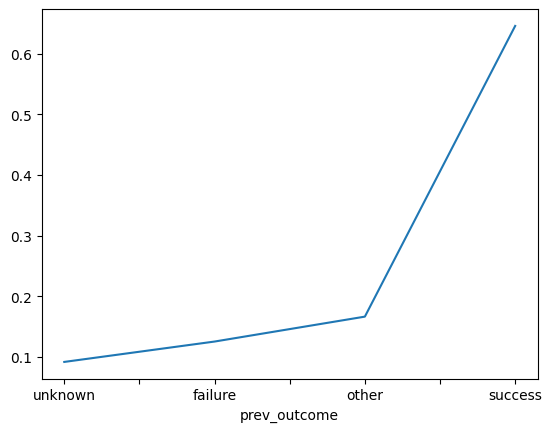

In [363]:
print(df.groupby("prev_outcome")["subscribe"].mean().sort_values())
#compared with subscribe vs prev_outcome
df.groupby("prev_outcome")["subscribe"].mean().sort_values().plot()

#### 1.The above graph represented that there is a strong relationship between the the Feature variable(prev_outcome) and Target variable(Subscribe),so,we retain this Feature column to predict the ML Algorithm.

#### 2.Based on analysis of prev_outcome column unknown are the majority people in the data,but,the percentage of probability to subscribe more for the Insurance is success

In [364]:
df["prev_outcome"]=df["prev_outcome"].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [365]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,subscribe
0,58.0,8,1,4,1,5,1,261,1,1,0
1,44.0,5,3,2,1,5,1,151,1,1,0
2,33.0,2,1,2,1,5,1,76,1,1,0
3,47.0,1,1,3,1,5,1,92,1,1,0
5,35.0,8,1,4,1,5,1,139,1,1,0


### Spliting the dataset

In [366]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["subscribe"])
y=df["subscribe"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=7)

### checking for the data is balanced or not

In [367]:
df['subscribe'].value_counts()

subscribe
0    39662
1     5255
Name: count, dtype: int64


From the above result we can clearly understand that the dataset is imbalanced. 

 #### Lets find the percentage.

In [368]:
#Finding the percentage of the data
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )

Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


From the above result we can clearly understand that the percentage for no is very high so the Majority class "no" with 88.29% and Minority class "yes" with 11.70%.

### Balancing the Train Data

##### Using Smote+ENN(oversampling+UnderSampling)

In [369]:
#Balancing the data
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [370]:
print(len(X_train_smoteenn))
print(len(y_train_smoteenn))

47506
47506


### Scaling

In [371]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smoteenn)
X_test_scaled = scaler.transform(X_test)

### Model Fiting

#### Logistic Regression

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train_scaled,y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test_scaled, y_test)}, F1-Score: {f1_score(model.predict(X_test_scaled), y_test)}")

Test data accuracy : 0.7513357079252003, F1-Score: 0.45182398167839033


### Decision Tree Classifier

In [373]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  model = DecisionTreeClassifier(max_depth = depth)
  model.fit(X_train_scaled,y_train_smoteenn)
  train_score = model.score(X_test_scaled,y_test)
  cross_val=np.mean(cross_val_score(model,X_train_scaled,y_train_smoteenn,cv=10))
  print(f"Depth-{depth},Train_score-{train_score},Cross_val-{cross_val}")

Depth-1,Train_score-0.6325319085782131,Cross_val-0.7834587865158581
Depth-2,Train_score-0.5741317898486198,Cross_val-0.8010566595398199
Depth-3,Train_score-0.6607301869991096,Cross_val-0.8556602864770853
Depth-4,Train_score-0.675348768180469,Cross_val-0.8636801914278432
Depth-5,Train_score-0.7032502226179875,Cross_val-0.876310330235186
Depth-6,Train_score-0.6996141288216088,Cross_val-0.882162168629319
Depth-7,Train_score-0.7665479370733155,Cross_val-0.8990864283419556
Depth-8,Train_score-0.7940783615316117,Cross_val-0.9090641305431543
Depth-9,Train_score-0.792668447610567,Cross_val-0.9161368487520634
Depth-10,Train_score-0.7871772039180766,Cross_val-0.9209996255635933
Depth-11,Train_score-0.7967497773820125,Cross_val-0.9260515836001286
Depth-12,Train_score-0.802760463045414,Cross_val-0.9303037543342677
Depth-13,Train_score-0.8125556544968834,Cross_val-0.9365555927284006
Depth-14,Train_score-0.8193084001187296,Cross_val-0.9397552825443951
Depth-15,Train_score-0.8286583555951321,Cross_va

In [374]:
model = DecisionTreeClassifier(max_depth = 29)
model.fit(X_train_scaled,y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test_scaled, y_test)}, F1-Score: {f1_score(model.predict(X_test_scaled), y_test)}")

Test data accuracy : 0.8325170673790442, F1-Score: 0.5178380687887204


### Random Forest Classifier

In [375]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 29, max_features = "sqrt")

for n in [10, 20, 50]:
  model = RandomForestClassifier(n_estimators = n, max_depth =  29, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model,X_train_scaled,y_train_smoteenn, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9642361652394509
N: 20, Cross-Val Score: 0.9672463237656338
N: 50, Cross-Val Score: 0.9679829797604936


In [376]:
model = RandomForestClassifier(n_estimators = 50, max_depth = 29, max_features = "sqrt")
model.fit(X_train_scaled,y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test_scaled, y_test)}, F1-Score: {f1_score(model.predict(X_test_scaled), y_test)}")

Test data accuracy : 0.8420154348471357, F1-Score: 0.5600330646827857


### XG Booster Classifier

In [377]:
from xgboost import XGBClassifier

for lamb in [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9, 1]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train_scaled,y_train_smoteenn, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.950385381470937
Lambda: 0.2, Cross-Val Score: 0.9618788465586192
Lambda: 0.3, Cross-Val Score: 0.9654153829110769
Lambda: 0.4, Cross-Val Score: 0.9681729453079131
Lambda: 0.5, Cross-Val Score: 0.9689939624898912
Lambda: 0.6, Cross-Val Score: 0.9694992522349866
Lambda: 0.7, Cross-Val Score: 0.9700674207092137
Lambda: 0.8, Cross-Val Score: 0.9700675181956153
Lambda: 0.9, Cross-Val Score: 0.970256885531024
Lambda: 1, Cross-Val Score: 0.9697096190275731


In [378]:
model = XGBClassifier(learning_rate = 0.9)
model.fit(X_train_scaled,y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test_scaled, y_test)}, F1-Score: {f1_score(model.predict(X_test_scaled), y_test)}")

Test data accuracy : 0.8584149599287623, F1-Score: 0.5671506352087115


### Overall Result

##### Logistic Regression:
Test data accuracy : 0.7513357079252003, F1-Score: 0.45182398167839033
##### Decision tree classification:
Test data accuracy : 0.8325170673790442, F1-Score: 0.5178380687887204
##### Random forest classification:
Test data accuracy : 0.8420154348471357, F1-Score: 0.5600330646827857
##### Xg booster classification:
Test data accuracy : 0.8584149599287623, F1-Score: 0.5671506352087115


### Based on the Evaluation XGbooster has a more f1_score,it has a better model to predict a Target variable(subscribe)

#### Important features

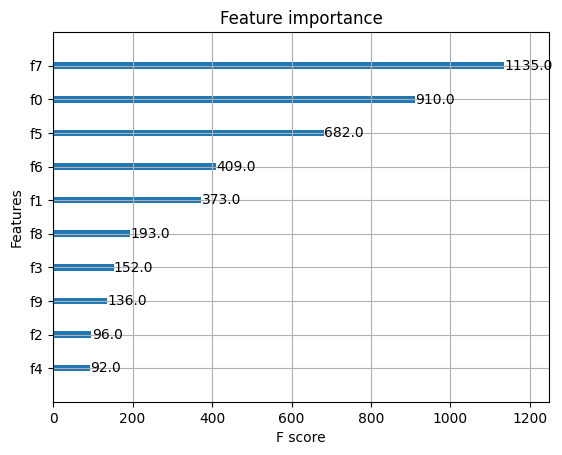

In [427]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()  

f0-'age',f1- 'job',f2- 'marital', f3-'education_qual',f4- 'call_type',f5- 'day', f6-'mon',f7-'dur', f8-'num_calls', f9-'prev_outcome', f10-'subscribe'

In [428]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'subscribe'],
      dtype='object')

#### Conclusion:
Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

##### Duration - Longer the call better influncing the clients
##### Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.(40-41)
##### Day - People who subscribed to insurance are mostly mid(after 15th) of the month.
##### Month - In the month of march people subscribed to insurance are more.
##### Job - In this blue collar people are targeted more but people who subscribed more are from students.

#### Overall Predicted by Thigazhvan